## Portfolio Part 3

In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the rating column has been changed with like or dislike values. Your task is to train classification models to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item| rating | helpfulness | gender | category |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __timestamp__ - the timestamp indicating when the user rated the shopping item
* __review__ - the user's review comments of the item
* __item__ - the name of the item
* __rating__ - the user like or dislike the item
* __helpfulness__ - average rating from other users on whether the review comment is helpful. 6-helpful, 0-not helpful. 
* __gender__ - the gender of the user, F- female, M-male
* __category__ - the category of the shopping item


Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the __rating__ field in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('Portfolio 3.csv')
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
5,4259,12100,Come here at least once in your life... stay a...,New York City,like,4,F,Hotels & Travel
6,4259,12400,"I joined for the free camera, and stood for no...",Earthlink,like,3,F,Online Stores & Services
7,4259,12700,They Should've Fooled the American Public,Blair Witch Project,dislike,4,F,Movies
8,4259,51600,A Short List of Things to Remember in NYC,New York City,like,4,F,Hotels & Travel
9,4259,60200,Do you know what a metaphysical can of worms t...,Being John Malkovich,like,4,F,Movies


In [3]:
#Checking if there is any missing values

df.isna().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
dtype: int64

In [9]:
#Changing to category to numerical values

ord_enc = OrdinalEncoder()
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df[["gender", "gender_code"]].head(20) 

,gender,gender_code
0,F,0.0
1,F,0.0
2,F,0.0
3,F,0.0
4,F,0.0
5,F,0.0
6,F,0.0
7,F,0.0
8,F,0.0
9,F,0.0


In [10]:
df["category_code"] = ord_enc.fit_transform(df[["category"]])
df[["category", "category_code"]].head(20)

,category,category_code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0
5,Hotels & Travel,2.0
6,Online Stores & Services,6.0
7,Movies,5.0
8,Hotels & Travel,2.0
9,Movies,5.0


In [14]:
df["rating_code"] = ord_enc.fit_transform(df[["rating"]])
df[["rating", "rating_code"]].head(20)

,rating,rating_code
0,like,1.0
1,like,1.0
2,like,1.0
3,like,1.0
4,dislike,0.0
5,like,1.0
6,like,1.0
7,dislike,0.0
8,like,1.0
9,like,1.0


In [11]:
df["review_code"] = ord_enc.fit_transform(df[["review"]])
df[["review", "review_code"]].head(20)

,review,review_code
0,"Finally, Something for (Relatively) Nothing",856.0
1,Shocking!,1985.0
2,Simply Shaggadelic!,2006.0
3,Better Than The First!,472.0
4,Blair Witch made me appreciate this,493.0
5,Come here at least once in your life... stay a...,599.0
6,"I joined for the free camera, and stood for no...",1232.0
7,They Should've Fooled the American Public,2415.0
8,A Short List of Things to Remember in NYC,136.0
9,Do you know what a metaphysical can of worms t...,692.0


In [12]:
df["item_code"] = ord_enc.fit_transform(df[["item"]])
df[["item", "item_code"]].head(20)

,item,item_code
0,MyPoints.com,43.0
1,Sixth Sense,62.0
2,Austin Powers: The Spy Who Shagged Me,9.0
3,Toy Story 2,77.0
4,Star Wars Episode I: The Phantom Menace,68.0
5,New York City,47.0
6,Earthlink,23.0
7,Blair Witch Project,12.0
8,New York City,47.0
9,Being John Malkovich,11.0


In [15]:
#Finding correlation between all numerical values

df.corr()

,userId,timestamp,helpfulness,gender_code,category_code,review_code,item_code,rating_code
userId,1.000000,-0.036399,-0.016841,0.056183,0.015408,0.013212,-0.002618,0.010844
timestamp,-0.036399,1.000000,0.003638,-0.049244,0.037118,-0.025036,0.024337,0.011579
helpfulness,-0.016841,0.003638,1.000000,-0.046627,-0.000189,0.016170,-0.010780,-0.016850
gender_code,0.056183,-0.049244,-0.046627,1.000000,-0.017644,-0.014422,0.006231,0.022576
category_code,0.015408,0.037118,-0.000189,-0.017644,1.000000,0.012047,-0.054699,-0.116312
review_code,0.013212,-0.025036,0.016170,-0.014422,0.012047,1.000000,0.168119,-0.046935
item_code,-0.002618,0.024337,-0.010780,0.006231,-0.054699,0.168119,1.000000,0.013629
rating_code,0.010844,0.011579,-0.016850,0.022576,-0.116312,-0.046935,0.013629,1.000000


# Remarks

It looks like rating is still most correlated to category and review, even though overall correlations are still pretty low, with category at -0.11 and review at -0.04

In [16]:
#Splitting traing and test set to 0.1 for test and 0.9 for train

train, test = train_test_split(df, test_size=0.1, random_state=142)
print(train.shape)
print(test.shape)

(2609, 13)
(290, 13)


# Logistic regression

In [59]:
#The model for logistic regression - picking the two most correlated features category and review

lr = LogisticRegression()

Xa = train[['category_code', 'review_code']]
ya = train['rating_code']

Xat = test[['category_code', 'review_code']]
yat = test['rating_code']

lr.fit(Xa, ya)

LogisticRegression()

In [60]:
y_pred_train = lr.predict(Xa)
y_pred_test = lr.predict(Xat)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(ya, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(yat, y_pred_test))

Acc on training set:  0.6385588348026063
Acc on test set:  0.6310344827586207


# RFE experiment

I try to go back and find the most helpful features using RFE

In [51]:
#Creating the data sets

Xc = df[['category_code', 'review_code', 'helpfulness', 'gender_code', 'item_code']]
yc = df['rating_code']

Xc.head()

,category_code,review_code,helpfulness,gender_code,item_code
0,6.0,856.0,4,0.0,43.0
1,5.0,1985.0,4,0.0,62.0
2,5.0,2006.0,4,0.0,9.0
3,5.0,472.0,3,0.0,77.0
4,5.0,493.0,4,0.0,68.0


In [52]:
lr.fit(Xc,yc)
rfe = RFE(lr)
rfe_model = rfe.fit(Xc, yc)
print("No. of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Features ranking: ", rfe_model.ranking_)

No. of features:  2
Selected features:  [ True False  True False False]
Features ranking:  [1 4 1 2 3]


From this, it seems like category and helpfulness are better features to use for this model

In [53]:
Xb = train[['category_code', 'helpfulness']]
yb = train['rating_code']

Xbt = test[['category_code', 'helpfulness']]
ybt = test['rating_code']

lr.fit(Xb, yb)

LogisticRegression()

In [54]:
y_pred_train_b = lr.predict(Xb)
y_pred_test_b = lr.predict(Xbt)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(yb, y_pred_train_b))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(ybt, y_pred_test_b))

Acc on training set:  0.6385588348026063
Acc on test set:  0.6310344827586207


The results are the same as the previous model using category and review

# KNN Classifier

In [55]:
train, test = train_test_split(df, test_size=0.1, random_state=142)

#Using KNN on training data with all 5 features

X_train = train[['category_code', 'review_code', 'helpfulness', 'gender_code', 'item_code']]
y_train = train['rating_code']

X_test = test[['category_code', 'review_code', 'helpfulness', 'gender_code', 'item_code']]
y_test = test['rating_code']

In [56]:
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.6137931034482759


In [57]:
#Using KNN on training data with just 2 features - category and review

clf.fit(Xa, ya)

# Use the model to predict testing data
y_pred = clf.predict(Xat)
accuracy = accuracy_score(y_pred, yat)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.6241379310344828


In [58]:
#Using KNN on training data with just 2 features - category and helpfulness

clf.fit(Xb, yb)

# Use the model to predict testing data
y_pred = clf.predict(Xbt)
accuracy = accuracy_score(y_pred, ybt)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.6379310344827587


# Remarks

It seems that the KNN algorithms works better with just 2 features, and category and helpfulness produce the higher accuracy

In [61]:
#Evaluate the model for 2 features category and review

scores = cross_val_score(clf, Xa, ya, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.60536398 0.64750958 0.56704981 0.61685824 0.57854406 0.62835249
 0.651341   0.53256705 0.60536398 0.61538462]
Average accuracy: 0.6048 +- 0.0348


In [62]:
#Evaluate the model for 2 features category and helpfulness

scores = cross_val_score(clf, Xb, yb, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.63218391 0.62068966 0.59770115 0.6091954  0.63601533 0.62068966
 0.57854406 0.6091954  0.63601533 0.61153846]
Average accuracy: 0.6152 +- 0.0172


# Hyper parameter tuning

Using the best model for KNN so far, 2 features with category and helpfulness

In [63]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(Xb, yb)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  29
The accuracy:  0.643937518420277


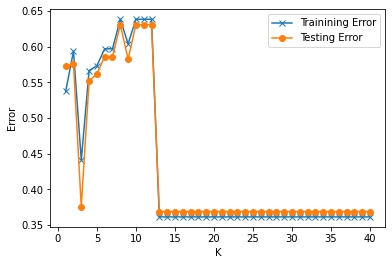

In [65]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(Xa, ya)
    training_error.append(1.0-accuracy_score(clf.predict(Xb), yb))
    testing_error.append(1.0-accuracy_score(clf.predict(Xbt), ybt))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

# Remarks

It looks like category and helpfulness are the better features for KNN model. K value of 29 is chosen by GridSearchCV, but looking at the plot, it makes more sense for interpretation that there are 3 clusters (error is very low at K=3 as well). It could be these are three clusters that reflect a rating of like/dislike more clearly. 